<a href="https://colab.research.google.com/github/meenubenny/Zomato_Restaurant_Clustering_and_Sentiment_Analysis/blob/main/Meenu_Benny_Zomato_Restaurant_Clustering_%26_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Zomato_Restaurant_Clustering_&_Sentiment_Analysis**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** - Meenu Benny
##### **Team Member 2 -** - T. Ompriya Subudhi



# **Project Summary -**

This project used advanced data analytics techniques to gain a deeper understanding of restaurants and customer feedback on the popular online meal delivery platform, Zomato.

Data obtained included information such as the restaurant name, location, dishes, average cost for two people, ratings, and user reviews.

I then began data cleaning and pre-processing, eliminating duplicate entries, correcting missing values, and converting the data into a format suitable for analysis.

The next step in the project was to perform clustering of the restaurant data using the k-means algorithm. The goal of clustering was to group similar restaurants together and identify patterns in the data. The characteristics used for clustering included restaurant location, cuisines, and average cost for two people. The number of clusters was determined using the elbow method.

I then conducted a sentiment analysis of the user ratings to gain a comprehensive understanding of the overall sentiment towards the restaurants. Certain libraries were used to classify the reviews as positive, negative, or neutral. I also extracted the most frequently occurring words in the reviews and visualized them by creating word clouds.

The result of the analysis showed that the restaurants in the city were classified into five groups based on location, cuisine, and average price for two people. The sentiment analysis showed that customers generally had a positive attitude towards the restaurants.

In summary, this project is an example of the usefulness of clustering and sentiment analysis to gain a deeper understanding of restaurant data on Zomato. The insights gained from the analysis can be of great use to both restaurants and customers to make informed decisions. In addition, the project can be extended to other cities or even countries to gain insights into the eating habits and preferences of people in different regions.

# **GitHub Link -**

https://github.com/meenubenny/Zomato_Restaurant_Clustering_and_Sentiment_Analysis

# **Problem Statement**


The problem statement for this project is to analyze and understand the restaurant industry in India by utilizing data from the Indian restaurant aggregator and food delivery start-up, Zomato. The project aims to gain insights into the sentiments of customer reviews, cluster Zomato restaurants into different segments, and analyze the data to make useful conclusions in the form of visualizations. The data analyzed includes information on cuisine, costing, and customer reviews. The project aims to assist customers in finding the best restaurant in their locality and aid the company in identifying areas for growth and improvement in the industry. Additionally, the project aims to use the data for sentiment analysis and identifying critics in the industry through the metadata of reviewers.

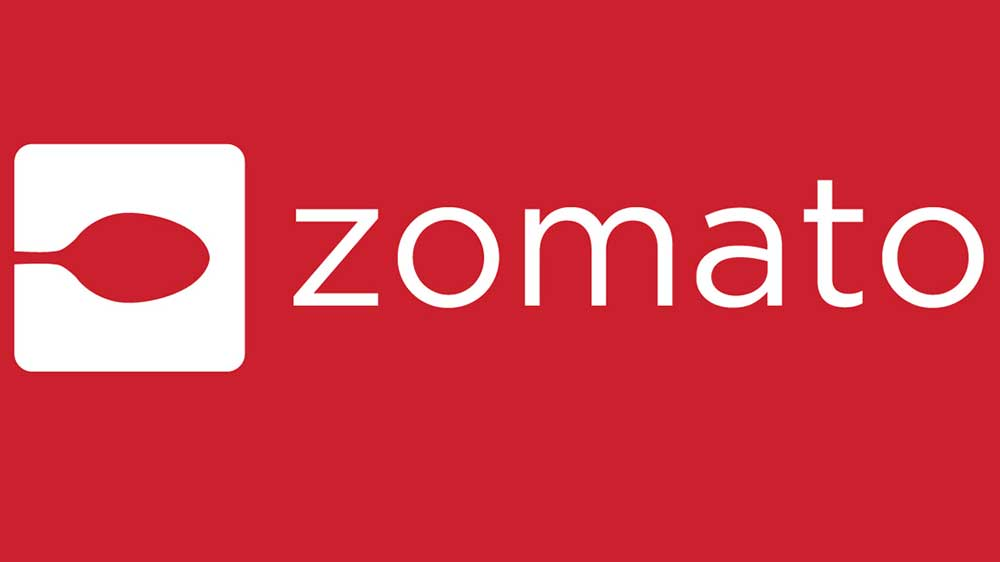

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
from IPython.display import Image
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import gensim

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset

hotel_df = pd.read_csv('/content/drive/MyDrive/Alma Better/capstone project/UNSUPERVISED/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/content/drive/MyDrive/Alma Better/capstone project/UNSUPERVISED/Zomato Restaurant reviews.csv')

### Dataset First View

In [4]:
# Dataset First Look - Restaurant
hotel_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
# Dataset First Look - Reviews
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f' The shape of Restaurents data is',hotel_df.shape)
print(f' The shape of Reviews data is',review_df.shape)

 The shape of Restaurents data is (105, 6)
 The shape of Reviews data is (10000, 7)


### Dataset Information

In [7]:
# Dataset Info - Restaurant
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [8]:
# Dataset Info - Reviews
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count

print(f'No. of duplicates in Restaurants data is {hotel_df.duplicated().sum()}')
print(f'No. of duplicates in Reviews data is {review_df.duplicated().sum()}')

No. of duplicates in Restaurants data is 0
No. of duplicates in Reviews data is 36


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count

print('Missing Values in Restaurants Data:-')
print(hotel_df.isnull().sum(),'\n')

print('Missing Values in Reviews Data:-')
print(review_df.isnull().sum())

Missing Values in Restaurants Data:-
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 

Missing Values in Reviews Data:-
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


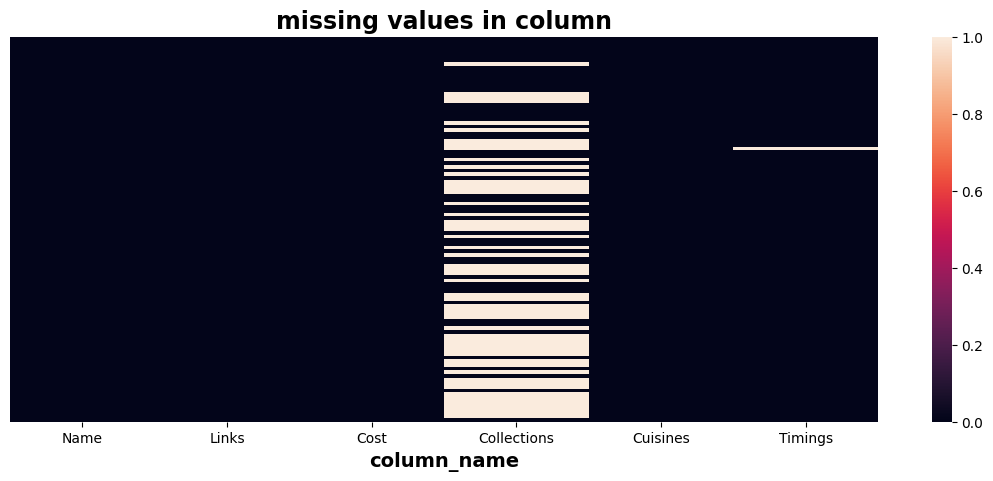

In [11]:
# Visualizing the missing values - Restaurant

plt.figure(figsize=(14,5))
sns.heatmap(hotel_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

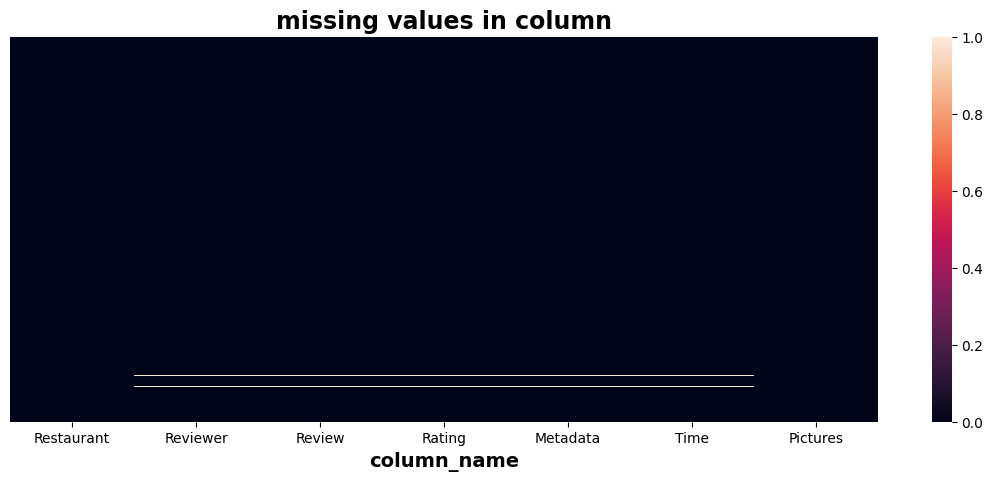

In [12]:
# Visualizing the missing values - Reviews

plt.figure(figsize=(14,5))
sns.heatmap(review_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

Restaurent Data

We have a limited number of rows and features in this dataset.
the type of 'Cost' should be an integer, but it is an object that must be treated.
the 'Time' characteristic must indicate the specific working hours of the restaurant, but here it is unstructured.
It has no duplicate values
the column "Time" has a null value and the characteristic 'Collection' has 51% null values.

Reviews Data

1000 rows and 7 features are presented in this data.
except 'Restaurent' and 'Pictures' each characteristic has some zeros.
the Dtype of 'Rating' must be int, but it shows an object.
36 values are duplicated in this data, and most duplicates have zero values
the feature 'Timing' should be datetime, but it shows object.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns

print(f'Restaurant data columns:- {list(hotel_df.columns)}\n')
print(f'Review data columns:- {list(review_df.columns)}')

Restaurant data columns:- ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

Review data columns:- ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [14]:
# Dataset Describe - Restaurant
hotel_df.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [15]:
# Dataset Describe - Reviews
review_df.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description

Restaurant data

Name : Restaurant name

Links : Web links of restaurants

Cost : Per person estimated cost for a meal

Collection : Keywording of restaurants by Zomato categories

Cuisines : Cuisines offered by the restaurants

Hours : Opening hours of the restaurants

Reviews data

Restaurant : Name of the restaurant

Reviewer : Name of the reviewer

Review : Text of the rating

Rating : Rating given by the reviewer

MetaData : Reviewer metadata - number of ratings and followers

Time : Date and time of the rating

Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.

print('No. of Unique values in Restaurant Data')
print(hotel_df.nunique(), '\n')

print('No. of Unique values in Reviews Data')
print(review_df.nunique())

No. of Unique values in Restaurant Data
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64 

No. of Unique values in Reviews Data
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


In [17]:
#creating copy of both the data
hotel = hotel_df.copy()
review = review_df.copy()

## 3. ***Data Wrangling***

### Data Wrangling Code

####   For Restaurant Data

In [18]:
# check the unique values of cost
hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [19]:
# Write your code to make your dataset analysis ready.
# changing the data type of the cost function
hotel['Cost'] = hotel['Cost'].str.replace(",","").astype('int64')

In [20]:
# converting cost column into int64
hotel = hotel.astype({'Cost':'int'})

In [21]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [22]:
# Get the function for number of cuisine in a hotel
def get_no_of_cuisine(cuisine):
  Cuisine_list=list(str(cuisine).split(','))
  return len(Cuisine_list)

# Create a new column with no of cuisine in hotel dataframe
hotel['No_of_cuisine']=hotel['Cuisines'].apply(get_no_of_cuisine)

####   For Review Data

In [23]:
#splitting the metadata into Reviews and Followers
review['No_of_reviews'],review['Followers'] = review['Metadata'].str.split(',').str
review['No_of_reviews'] = pd.to_numeric(review['No_of_reviews'].str.split(' ').str[0])
review['Followers'] = pd.to_numeric(review['Followers'].str.split(' ').str[1])
review

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,No_of_reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3.0,2.0
...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,53.0,54.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,2.0,53.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,65.0,423.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,13.0,144.0


In [24]:
# Filling the null values of Followes with 0
review['Followers'].fillna(0,inplace=True)

In [25]:
# convert the 'Time' column from object to datetime data type
review['Time'] = pd.to_datetime(review['Time'], format='%m/%d/%Y %H:%M')
review['Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Time
Non-Null Count  Dtype         
--------------  -----         
9962 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [26]:
# Converting Time to date time and extracting Hour and year
review['Time']=pd.to_datetime(review['Time'])
review['Year']=pd.DatetimeIndex(review['Time']).year
review['Month']=pd.DatetimeIndex(review['Time']).month
review['Hour'] = pd.DatetimeIndex(review['Time']).hour

In [27]:
review.describe()

,Pictures,No_of_reviews,Followers,Year,Month,Hour
count,10000.000000,9962.000000,10000.000000,9962.000000,9962.000000,9962.000000
mean,0.748600,23.990865,162.374800,2018.452118,6.017868,15.187412
std,2.570381,50.615027,618.852357,0.562494,3.159464,6.579646
min,0.000000,0.000000,0.000000,2016.000000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,2018.000000,4.000000,12.000000
50%,0.000000,4.000000,6.000000,2018.000000,5.000000,16.000000
75%,0.000000,22.000000,63.000000,2019.000000,8.000000,21.000000
max,64.000000,1031.000000,13410.000000,2019.000000,12.000000,23.000000


In [28]:
# Total count of ratings from 1 star to 5 star
ratings = review['Rating'].value_counts().reset_index()
ratings.rename(columns={'index': 'Ratings(1-5)'}, inplace=True)
ratings.rename(columns={'Rating': 'Count'}, inplace=True)
ratings

,Ratings(1-5),Count
0,5,3832
1,4,2373
2,1,1735
3,3,1193
4,2,684
5,4.5,69
6,3.5,47
7,2.5,19
8,1.5,9
9,Like,1


In [29]:
# drop the rows where 'Rating' is not equal to 'Like'
review = review[review['Rating'] != 'Like']

In [30]:
# Converting Rating dtype into float
review['Rating'] = review['Rating'].astype('float')

In [31]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9999 non-null   object        
 1   Reviewer       9961 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9961 non-null   float64       
 4   Metadata       9961 non-null   object        
 5   Time           9961 non-null   datetime64[ns]
 6   Pictures       9999 non-null   int64         
 7   No_of_reviews  9961 non-null   float64       
 8   Followers      9999 non-null   float64       
 9   Year           9961 non-null   float64       
 10  Month          9961 non-null   float64       
 11  Hour           9961 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 1015.5+ KB


In [32]:
# extract Review_count and Followers from Metadata
review['Review_count'] = review['Metadata'].str.extract('(\d+) Review')
review['Followers'] = review['Metadata'].str.extract('(\d+) Follower')

In [33]:
# fill missing values with 0 in 'Review_count' column and 'Followers' column
review['Review_count'] = pd.to_numeric(review['Review_count']).fillna(0).astype(int)
review['Followers'] = pd.to_numeric(review['Followers']).fillna(0).astype(int)

In [34]:
# Dropping unnecessary column as it is not needed now
review = review.drop(columns=['Metadata'])
review.isnull().sum()

Restaurant        0
Reviewer         38
Review           45
Rating           38
Time             38
Pictures          0
No_of_reviews    38
Followers         0
Year             38
Month            38
Hour             38
Review_count      0
dtype: int64

In [35]:
#Most popular cuisines
cuisine_list=[]
cuisines=hotel.Cuisines.str.split(',')

#Get all the cuuisines in a list
for i in cuisines:
  for j in i:
    cuisine_list.append(j)

# converting it to dataframe
cuisine_series=pd.Series(cuisine_list)
cuisine_df=pd.DataFrame(cuisine_series,columns=['Cuisines'])
cuisine_df[cuisine_df['Cuisines']==' North Indian']='North Indian'

In [36]:
#Let's Find the count of each cuisine
cuisine_=pd.DataFrame(cuisine_df.groupby(by='Cuisines',as_index=False).value_counts())
cuisine_

,Cuisines,count
0,American,2
1,Andhra,3
2,Arabian,1
3,Asian,10
4,BBQ,1
...,...,...
64,North Indian,61
65,Seafood,1
66,South Indian,2
67,Street Food,2


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [37]:
# Chart - 1 visualization code
#Find out the costliest restaurants
costly_res=hotel[['Name','Cost']].groupby('Name',as_index=False).mean().sort_values(by='Cost',ascending=False).head(10).reset_index(drop=True)
costly_res

,Name,Cost
0,Collage - Hyatt Hyderabad Gachibowli,2800.0
1,Feast - Sheraton Hyderabad Hotel,2500.0
2,10 Downing Street,1900.0
3,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
4,Cascade - Radisson Hyderabad Hitec City,1800.0
5,Zega - Sheraton Hyderabad Hotel,1750.0
6,Republic Of Noodles - Lemon Tree Hotel,1700.0
7,Mazzo - Marriott Executive Apartments,1700.0
8,Barbeque Nation,1600.0
9,Arena Eleven,1600.0


In [38]:
#Find out the cheapest restaurants
cheapest_res = hotel[['Name','Cost']].groupby('Name',as_index=False).mean().sort_values(by='Cost',ascending=True).head(10).reset_index(drop=True)
cheapest_res

,Name,Cost
0,Mohammedia Shawarma,150.0
1,Amul,150.0
2,Sweet Basket,200.0
3,KS Bakers,200.0
4,Momos Delight,200.0
5,Hunger Maggi Point,200.0
6,Asian Meal Box,200.0
7,Wich Please,250.0
8,Shah Ghouse Spl Shawarma,300.0
9,Tempteys,350.0


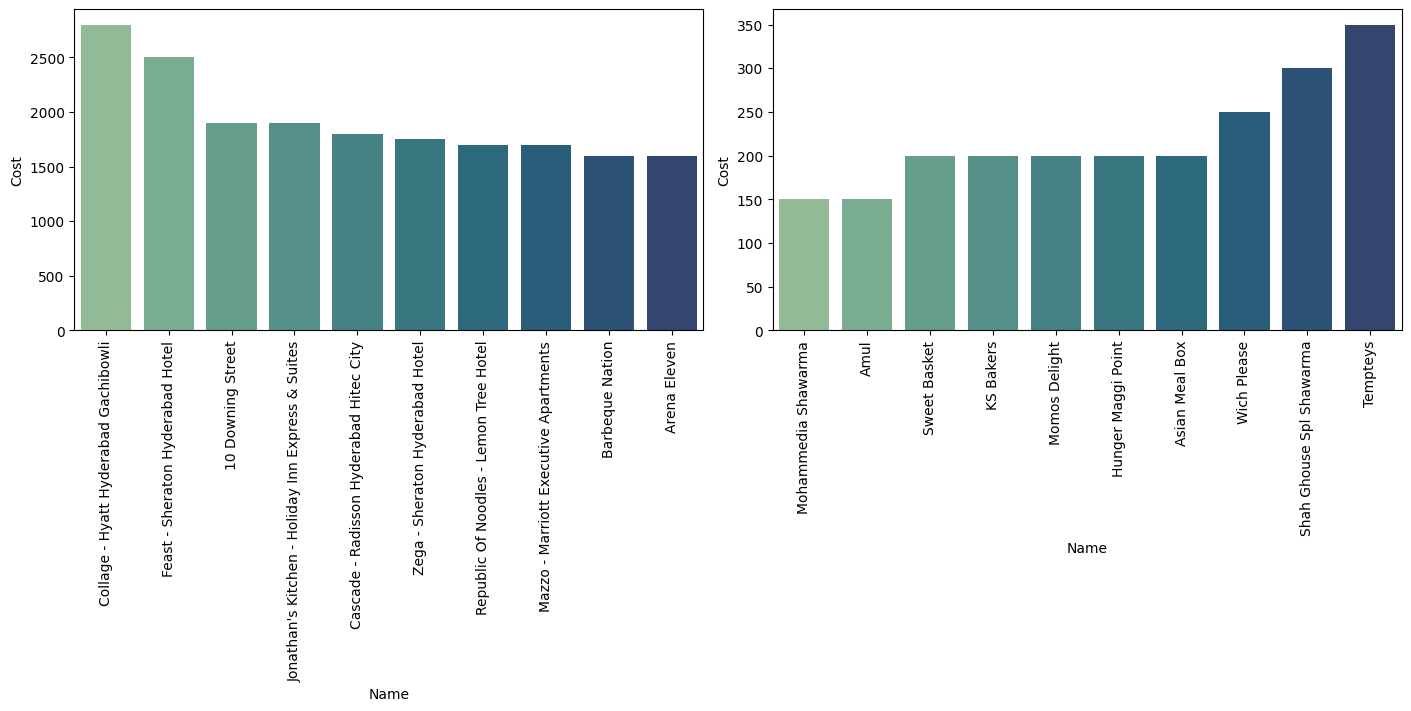

In [39]:
#visualisation of most expensive and cheapest restaurant
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

#costliest restaurant
a=sns.barplot(x = 'Name',y = 'Cost',data = costly_res,ax = axes[0],palette = 'crest')
a.set_xticklabels(labels=costly_res['Name'].to_list(),rotation=90)

#cheapest restaurant
b=sns.barplot(x = 'Name',y = 'Cost',data = cheapest_res,ax = axes[1],palette = 'crest')
b.set_xticklabels(labels=cheapest_res['Name'].to_list(),rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart is a univariate chart that is excellent for plotting different observations of a single characteristic. The above chart was chosen to visualize which restaurants on Zomato are expensive and which are cheap.

##### 2. What is/are the insight(s) found from the chart?

Expensive Restaurants : Here "Collage - Hyatt Hyderabad Gachibowli" is the most expensive restaurant with a price of 2800 rupees, followed by "Feast - Sheraton Hyderabad Hotel" with a price of 2500 rupees. Other expensive restaurants can be seen from the chart and table.

Cheap Restaurants : Here "Mohammedia Shawarma" and "Amul" is the cheapest restaurant where we can get the dish with the minimum price of 150 rupees followed by "Sweet Basket", "KS Bakers", "Momos Delight etc whose price is 200 rupees.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From this insight we learn which restaurants have dishes with lower prices. So, a middle-income person can easily afford it. This can be beneficial for both the restaurant in question and Zomato, as more people will order food from Zomato.

Also, we learn which restaurants are the most expensive, which leads to a negative growth of these restaurants, as they are afraid of losing money if they do not achieve the desired taste among customers.

#### Chart - 2

In [40]:
# Chart - 2 visualization code

#Most popular cuisines
cuisine_list=[]
cuisines=hotel.Cuisines.str.split(',')

#Get all the cuuisines in a list
for i in cuisines:
  for j in i:
    cuisine_list.append(j)

# converting it to dataframe
cuisine_series=pd.Series(cuisine_list)
cuisine_df=pd.DataFrame(cuisine_series,columns=['Cuisines'])
cuisine_df[cuisine_df['Cuisines']==' North Indian']='North Indian'

In [41]:
#Let's Find the count of each cuisine
cuisine_=pd.DataFrame(cuisine_df.groupby(by='Cuisines',as_index=False).value_counts())
cuisine_

,Cuisines,count
0,American,2
1,Andhra,3
2,Arabian,1
3,Asian,10
4,BBQ,1
...,...,...
64,North Indian,61
65,Seafood,1
66,South Indian,2
67,Street Food,2


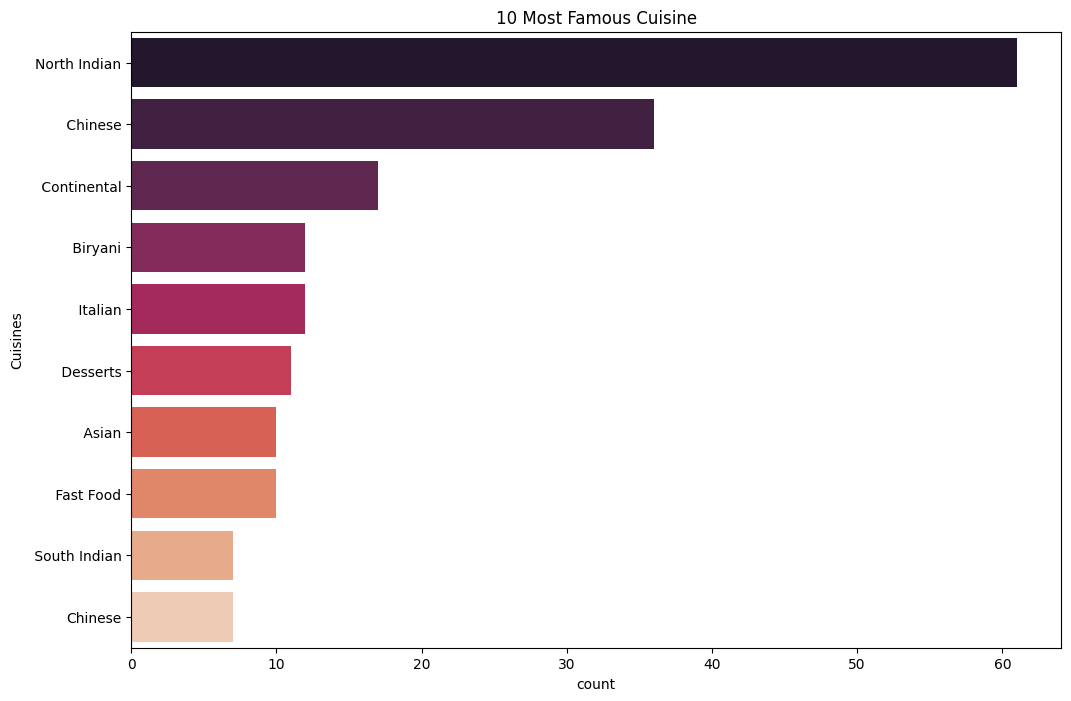

In [42]:
#visualisation of most famous cuisines
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(x='count', y='Cuisines', data=cuisine_.sort_values(ascending=False, by='count')[:10],palette='rocket')
plt.title('10 Most Famous Cuisine')
plt.show()

##### 1. Why did you pick the specific chart?

Since categorical features are best visualized by a bar chart. Therefore a bar chart is used.The above chart was chosen to visualize the most 10 famous cuisines.

##### 2. What is/are the insight(s) found from the chart?

It can be clearly seen that North Indian cuisine is most commonly served in restaurants, followed by Chinese and Continental cuisine.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can be helpful for new entrepreneurs who want to open new restaurants in their area, so they can learn what people like most and add that cuisine to their menu.

#### Chart - 3

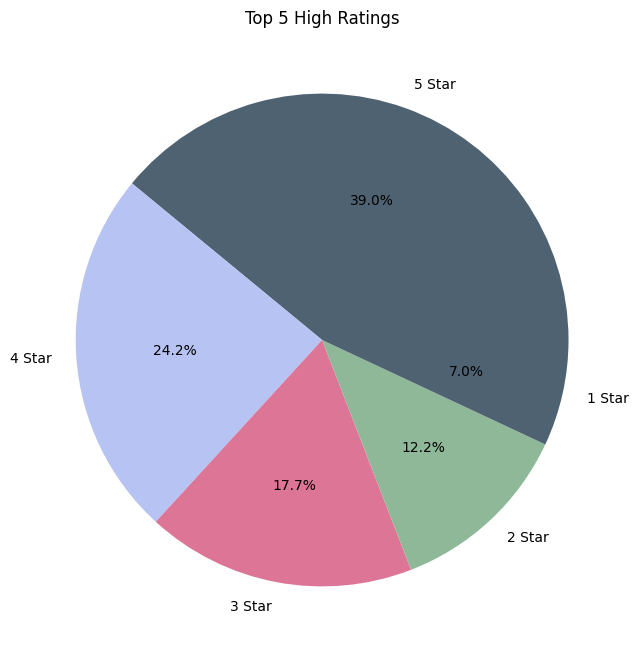

In [80]:
# Chart - 3 visualization code
# Pie Plot of Total count of ratings from 1 star to 5 star
plt.figure(figsize=(15,8))
x_label = review['Rating'].value_counts().index
y_label = review['Rating'].value_counts().values
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
keys = [ '5 Star', '4 Star', '3 Star', '2 Star', '1 Star']
plt.pie(x = y_label[:5], labels = keys, autopct='%1.1f%%', colors=colors)
plt.title('Top 5 High Ratings', color= 'black')
plt.show()


##### 1. Why did you pick the specific chart?

The main purpose of using a pie chart is to show a part-whole relationship in our data. The parts of the chart are proportional to the proportion of the total in each category. The total "pie" represents one hundred percent of the whole, while the "pie "slices" also denote parts of the whole. It shows the total coverage by space type, neighbourhood group, and neighbourhood.

##### 2. What is/are the insight(s) found from the chart?

Diagram shows that most of the restaurants have 4 and 5 stars, distributed in 39% and 24.2%, respectively. Restaurants with 1 star have only 7% of the ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We have found that a smaller number of different types of dishes can affect the image of the restaurant, as customers are primarily looking for the different types of dishes according to their preferences.

#### Chart - 4

In [44]:
# Chart - 4 visualization code
reviewer_list = review.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:15]
top_reviewers.head()

,Reviewer,Review_Count
655,Ankita,13
3858,Parijat Ray,13
2654,Kiran,12
2313,Jay Mehta,11
7013,Vedant Killa,11


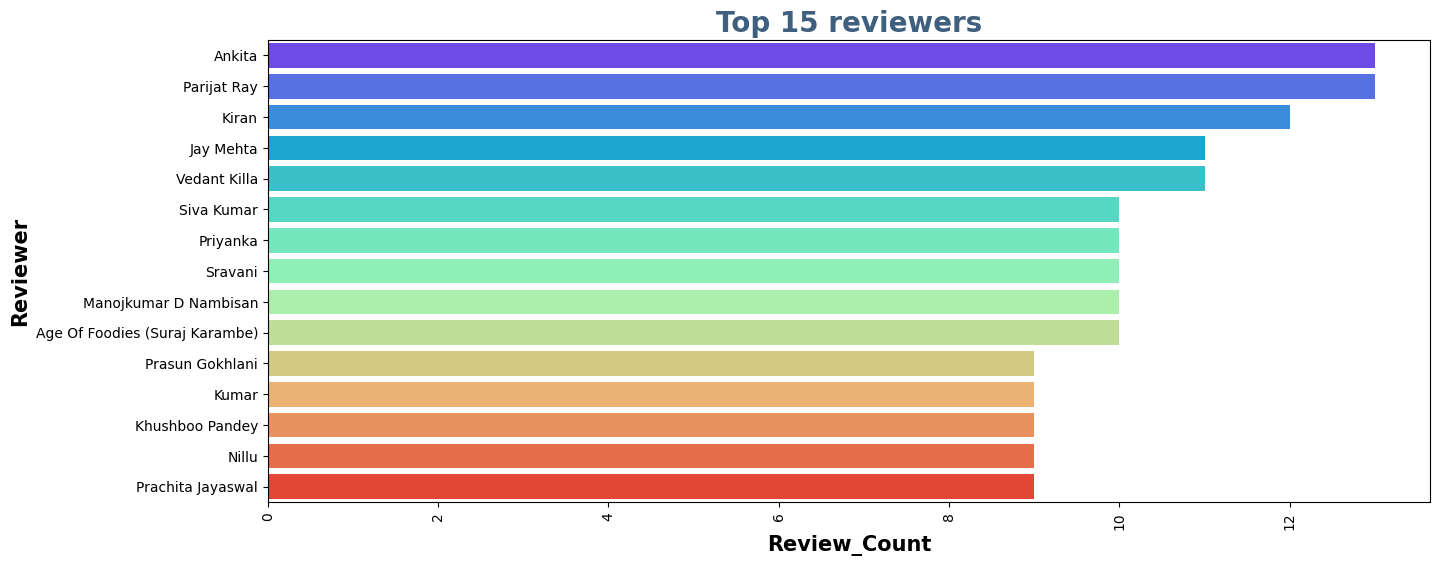

In [45]:
# top reviewers that have more review
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 15 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart is a univariate chart that is excellent for plotting different observations of a single characteristic. The above chart was chosen to visualize the top reviewers that have more review

##### 2. What is/are the insight(s) found from the chart?


From the above diagram, we found that the reviewer named Ankita gave the highest ratings which is greater than 12.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Top reviewers will always check the reviews before going to a restaurants, so it's essential to strive for positive reviews from the majority of them.

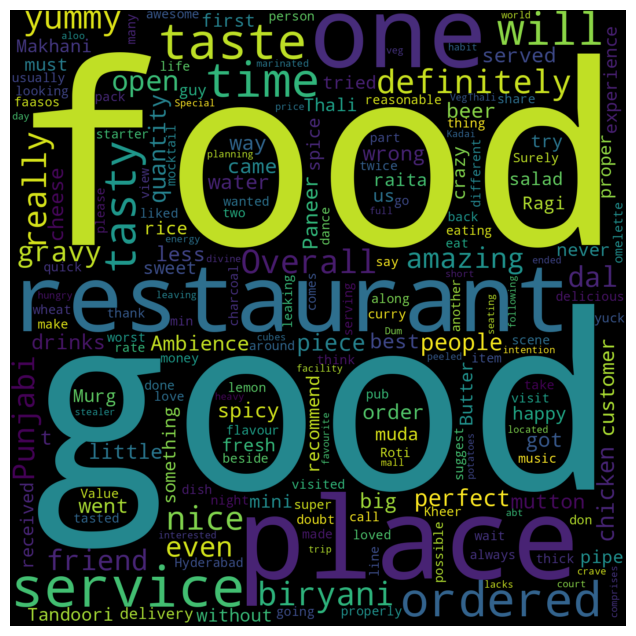

In [46]:
#Creating word cloud for reviews
plt.figure(figsize=(15,8))
text = " ".join(name for name in review.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")
plt.show()

#### Chart - 5

In [47]:
# Review per hour
reviews_hour = review.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')

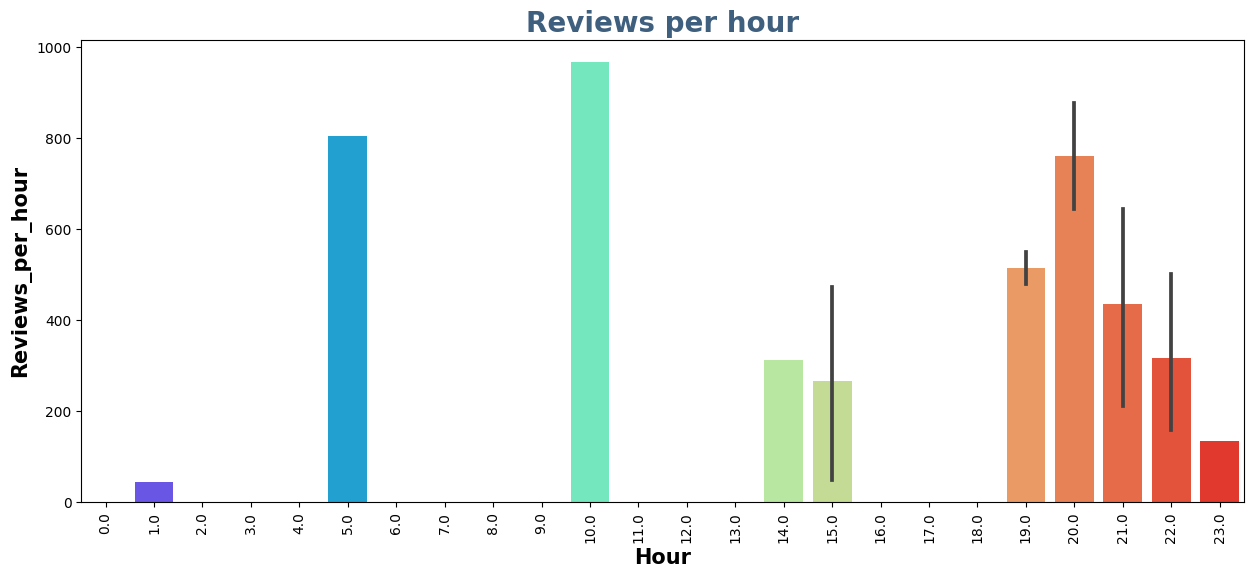

In [48]:
# Chart - 5 visualization code
# plotting reviews per hour
plt.figure(figsize=(15,6))
x = review['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()


##### 1. Why did you pick the specific chart?

Barplot shows the observations in each categorical bin using bars. The above chart is the reviews per hour v/s hours

##### 2. What is/are the insight(s) found from the chart?

As we can see, there is an increase in reviews from the afternoon to midnight. This is likely due to the fact that most people are working or at school during the morning hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the graph, a restaurant owner can decide on the peak times when most customers visit, so they can prepare the most food during those times.

#### Chart - 6

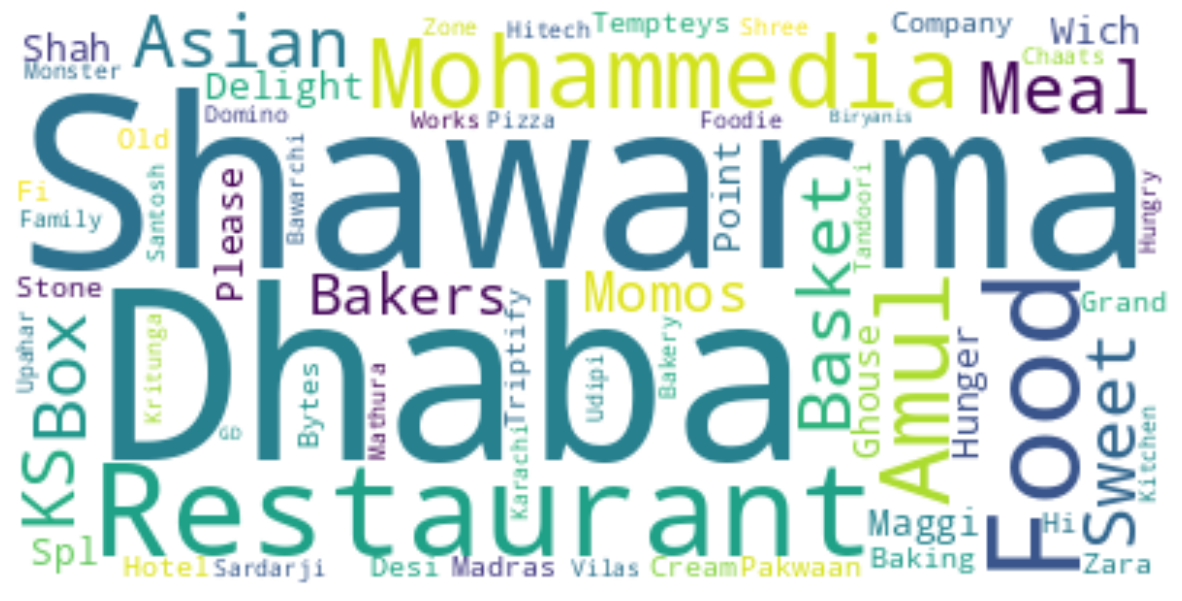

In [49]:
# Chart - 6 visualization code
#CREATING WORDCLOUD FOR CHEAPEST RESTAURANT
plt.figure(figsize=(15,8))
text = " ".join(name for name in hotel.sort_values('Cost',ascending=True).Name[:30])

# Creating word_cloud with text as argument in .generate() method
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off")
plt.show()

(-0.5, 1999.5, 1999.5, -0.5)

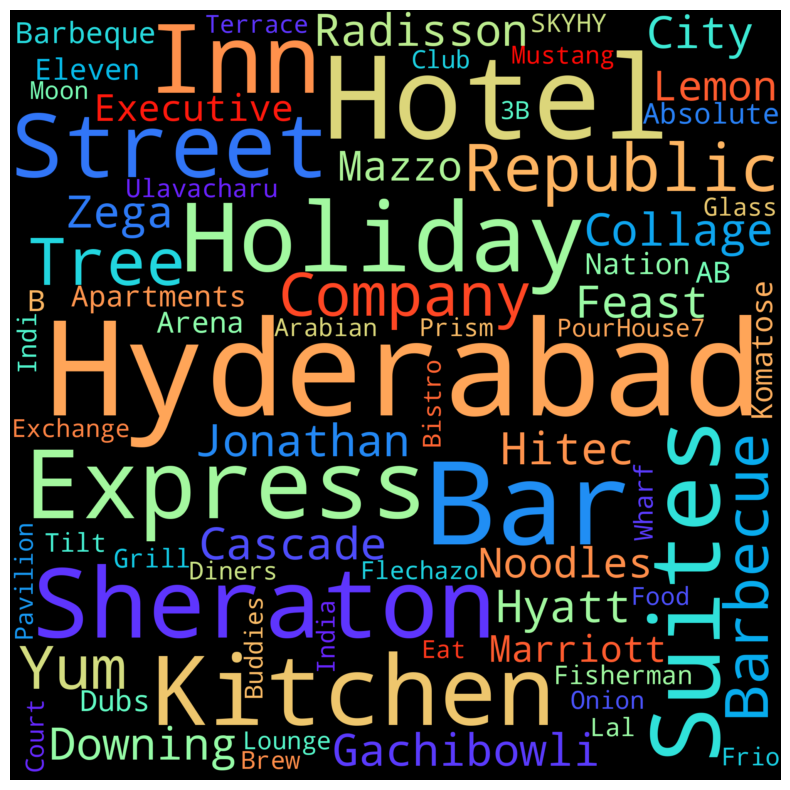

In [50]:
#CREATING WORDCLOUD FOR EXPENSIVE RESTAURANT
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
text = " ".join(name for name in hotel.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis("off")

##### 1. Why did you pick the specific chart?

I used Wordcloud because it show all text and highlight the most frequent words.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, the most repeating words are HYDERABAD, HOTEL, BAR for expensive restaurants, while for cheap restaurants SHAWARMA, DHABA, RESTAURANTS these words are repeating most.So it can be inferred that Hotel and Bars of Hyderabad are expensive while Dhabas and Restaurants are cheaper.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above wordcloud a customer will strike the repaeting words.

#### Chart - 7

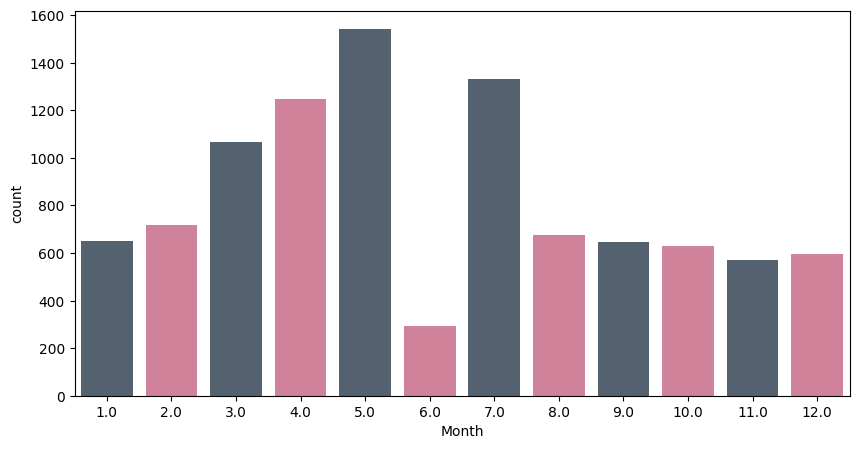

In [51]:
# Chart - 7 visualization code
#count plot of review w.r.t month
plt.figure(figsize=(10,5))
sns.countplot(x=review['Month'],palette=['#4F6272','#DD7596'])
plt.show()

##### 1. Why did you pick the specific chart?

Count plot shows the counts of observations in each categorical bin using bars, countplot used for categorical instead of quantitative variable. The above chart shows count plot of most reviewed month.

##### 2. What is/are the insight(s) found from the chart?

The count plot above clearly shows that the month of May had the highest number of customers providing reviews for a restaurant, while the month of July had the lowest number of reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

According to the above diagram, a restaurant owner can determine the busiest month by analyzing high review ratings, indicating that more customers visited the restaurant during that time.

#### Chart - 8

In [52]:
# Chart - 8 visualization code
# No of reviews given to the restaurants
res_review=review[['Restaurant', 'No_of_reviews']].sort_values(by = 'No_of_reviews', ascending = False).head(20).reset_index(drop=True)
res_review

,Restaurant,No_of_reviews
0,Pista House,1031.0
1,Labonel,1031.0
2,Collage - Hyatt Hyderabad Gachibowli,1031.0
3,Owm Nom Nom,685.0
4,The Old Madras Baking Company,665.0
5,Aromas@11SIX,560.0
6,Hyderabadi Daawat,482.0
7,Chinese Pavilion,472.0
8,Tempteys,452.0
9,The Old Madras Baking Company,452.0


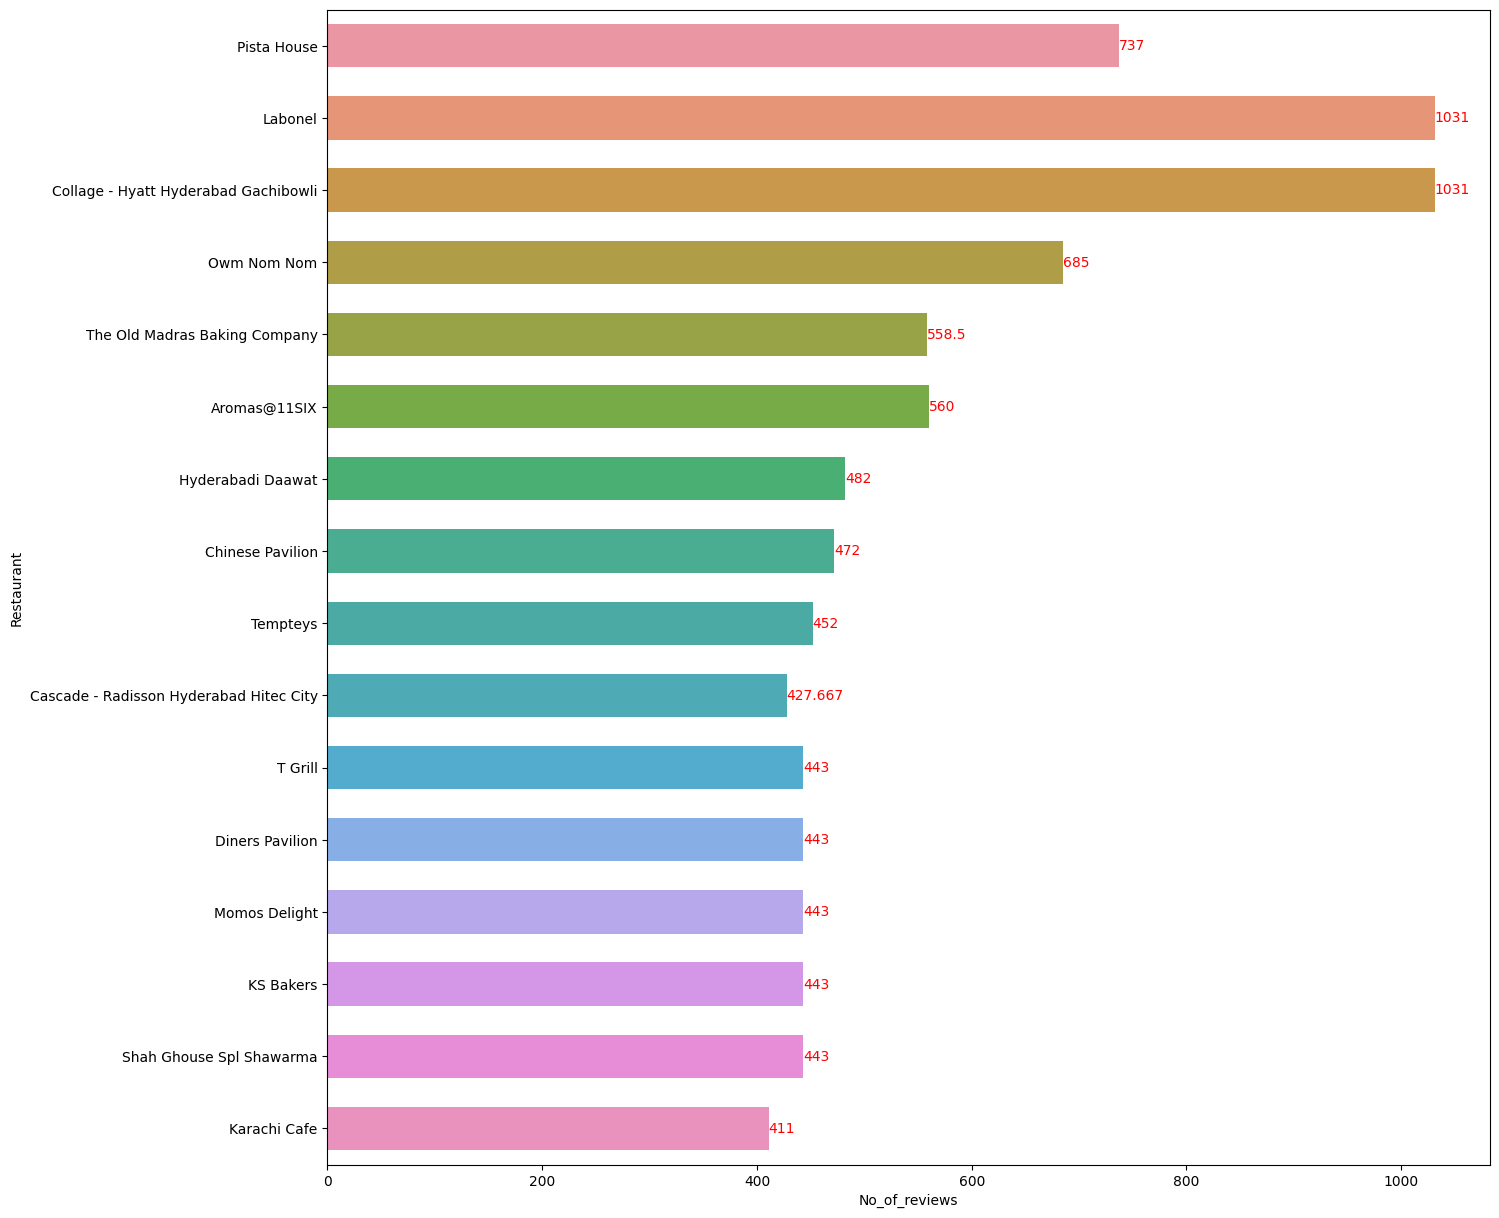

In [53]:
# No of reviews for top 20 restaurants(by reviews)
plt.figure(figsize = (15,15))
ax = sns.barplot(x = 'No_of_reviews',y = 'Restaurant',data = res_review,errwidth = 0, width = 0.6)
ax.set_facecolor("white")
ax.bar_label(ax.containers[0], color = 'red')
plt.show()

##### 1. Why did you pick the specific chart?

In order to determine which restaurants have received the highest number of reviews.

##### 2. What is/are the insight(s) found from the chart?

Here, Labonel and Collage at the Hyatt Hyderabad Gachibowli, with a total of 1031 positive reviews, are the most highly rated restaurants, making them a great choice.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [54]:
# Chart - 9 visualization code
# TOTAL Followers of reviewers FOR THE PARTICULAR RESTAURANT
follower_count=pd.DataFrame(review[['Restaurant', 'Followers']]
                       .groupby(by='Restaurant',as_index=False)['Followers'].sum()
                       .sort_values(by='Followers',ascending=False).reset_index(drop=True))


In [55]:
# Restaurants with highest number of reviewer followers
follower_top10=follower_count.head(10)
follower_top10

,Restaurant,Followers
0,Pista House,51068
1,Komatose - Holiday Inn Express & Suites,46229
2,Hyderabadi Daawat,45375
3,The Tilt Bar Republic,42126
4,Dunkin' Donuts,37667
5,Chinese Pavilion,35426
6,Faasos,34640
7,T Grill,32222
8,Cascade - Radisson Hyderabad Hitec City,31644
9,Barbeque Nation,30866


In [56]:
# Restaurants with lowest number of reviewer followers
follower_bottom10=follower_count.tail(10)
follower_bottom10

,Restaurant,Followers
90,Flechazo,2748
91,Kritunga Restaurant,2223
92,Hotel Zara Hi-Fi,1818
93,"3B's - Buddies, Bar & Barbecue",1676
94,Royal Spicy Restaurant,1497
95,Delhi-39,1222
96,AB's - Absolute Barbecues,1060
97,Paradise,798
98,Mohammedia Shawarma,791
99,Shree Santosh Dhaba Family Restaurant,562


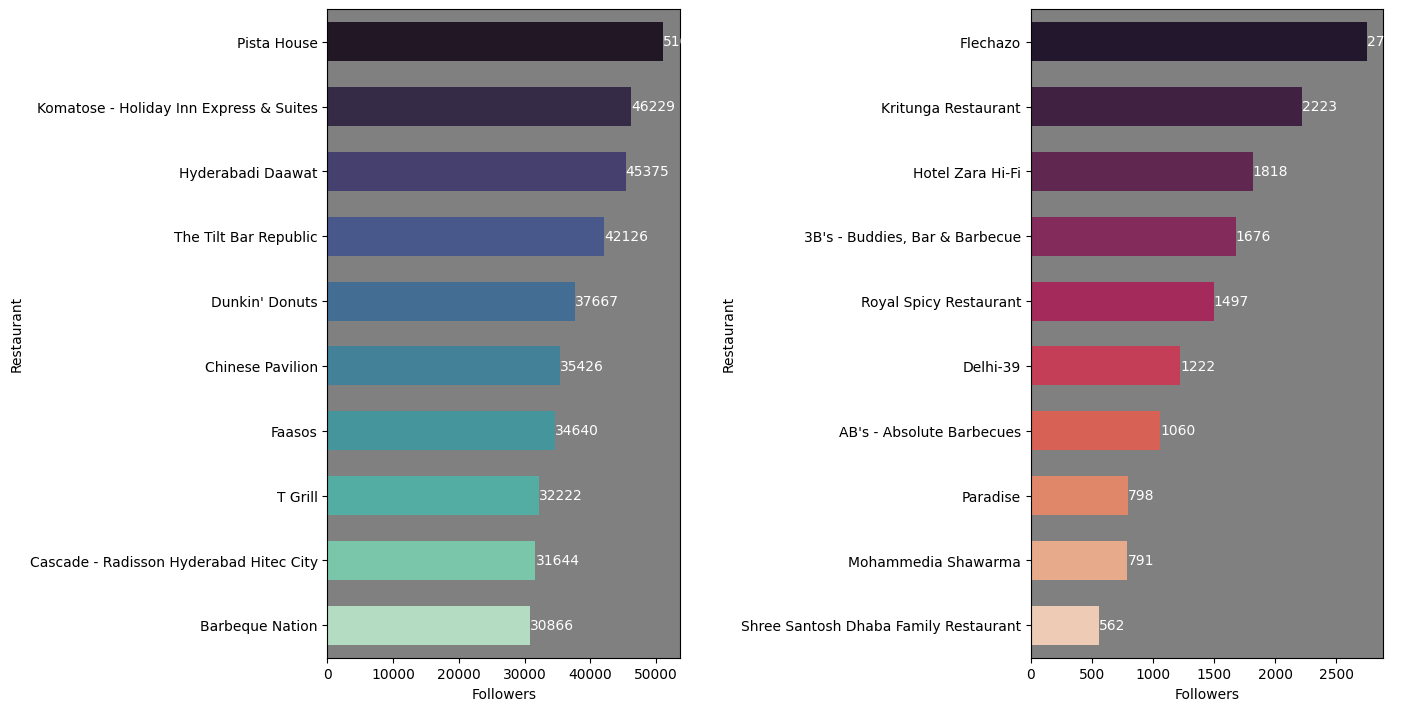

In [57]:
# Visualizing it through bar graph
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

# Visualization of top 10 restaurants with highest number of followers
a = sns.barplot(x = 'Followers',y = 'Restaurant',data = follower_top10 ,palette = "mako",errwidth=0, width=0.6,ax=axes[0])
a.set_facecolor("red")
a.bar_label(a.containers[0], color= 'White')
a.set_yticklabels(labels=follower_top10['Restaurant'].to_list())
a.set_facecolor("grey")

# Visualization of bottom 10 restaurants with lowest number of followers
b = sns.barplot(x = 'Followers',y = 'Restaurant',data = follower_bottom10 ,palette = 'rocket',errwidth=0, width=0.6,ax=axes[1])
b.set_facecolor("red")
b.bar_label(b.containers[0], color= 'White')
b.set_yticklabels(labels=follower_bottom10['Restaurant'].to_list())
b.set_facecolor("grey")

##### 1. Why did you pick the specific chart?

Barplot is used to see the least and most follower of reviewer of the restaurants.

##### 2. What is/are the insight(s) found from the chart?

The reviewer of "Pista House" has the most followers, while the reviewers of "Shree Santosh Dhaba Family Restaurant" have the least.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Bussiness men can find the trend of the customers.

#### Chart - 14 - Correlation Heatmap

In [70]:
#changing the name of the column to restaurant_name
hotel.rename({'Name':'Restaurant_name'},axis=1, inplace=True )
hotel.head(2)

,Restaurant_name,Links,Cost,Collections,Cuisines,Timings,No_of_cuisine
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,3


In [71]:
#changing the restuarant column name to restaurant_name
review.rename({'Restaurant':'Restaurant_name'},axis=1, inplace=True )
review.head(2)

,Restaurant_name,Reviewer,Review,Rating,Time,Pictures,No_of_reviews,Followers,Year,Month,Hour,Review_count
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1.0,2,2019.0,5.0,15.0,1
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3.0,2,2019.0,5.0,14.0,3


In [72]:
# merging both the data together on Restaurant_name column
zomato_df = pd.merge(hotel, review.drop_duplicates(), on = 'Restaurant_name', how='left')
zomato_df.shape

(9968, 18)

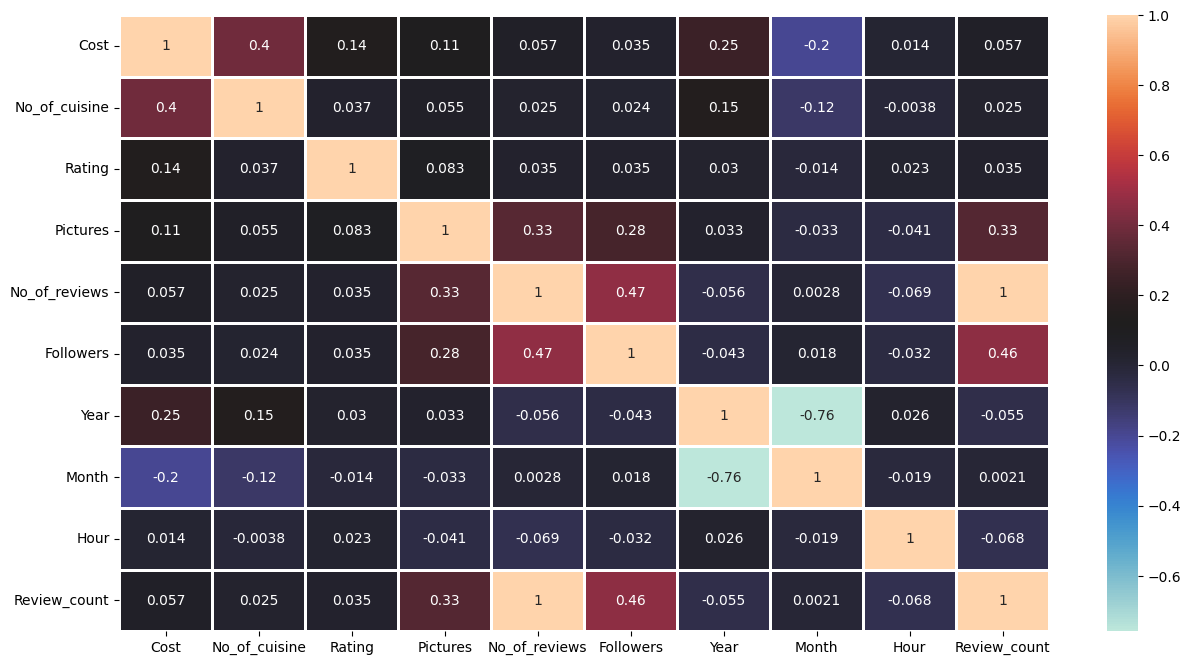

In [73]:
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(zomato_df.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table that shows the correlation coefficients between variables. It can be used to summarize data, as well as input into more advanced analyses or as a diagnostic tool. The correlation coefficient can range from -1 to 1.

##### 2. What is/are the insight(s) found from the chart?

There are 46% of positive correlation b/w Review_count and Followers.There are positive correlation between Cuisine_count and cost i.e. the restaurant with more number of cuisine has higher cost as compared to the restauranr with less number of cuisine.There are also 35% of positive correlation b/w review_count and ratings.we conclude that there is no strong correlation between any variables.

#### Chart - 15 - Pair Plot

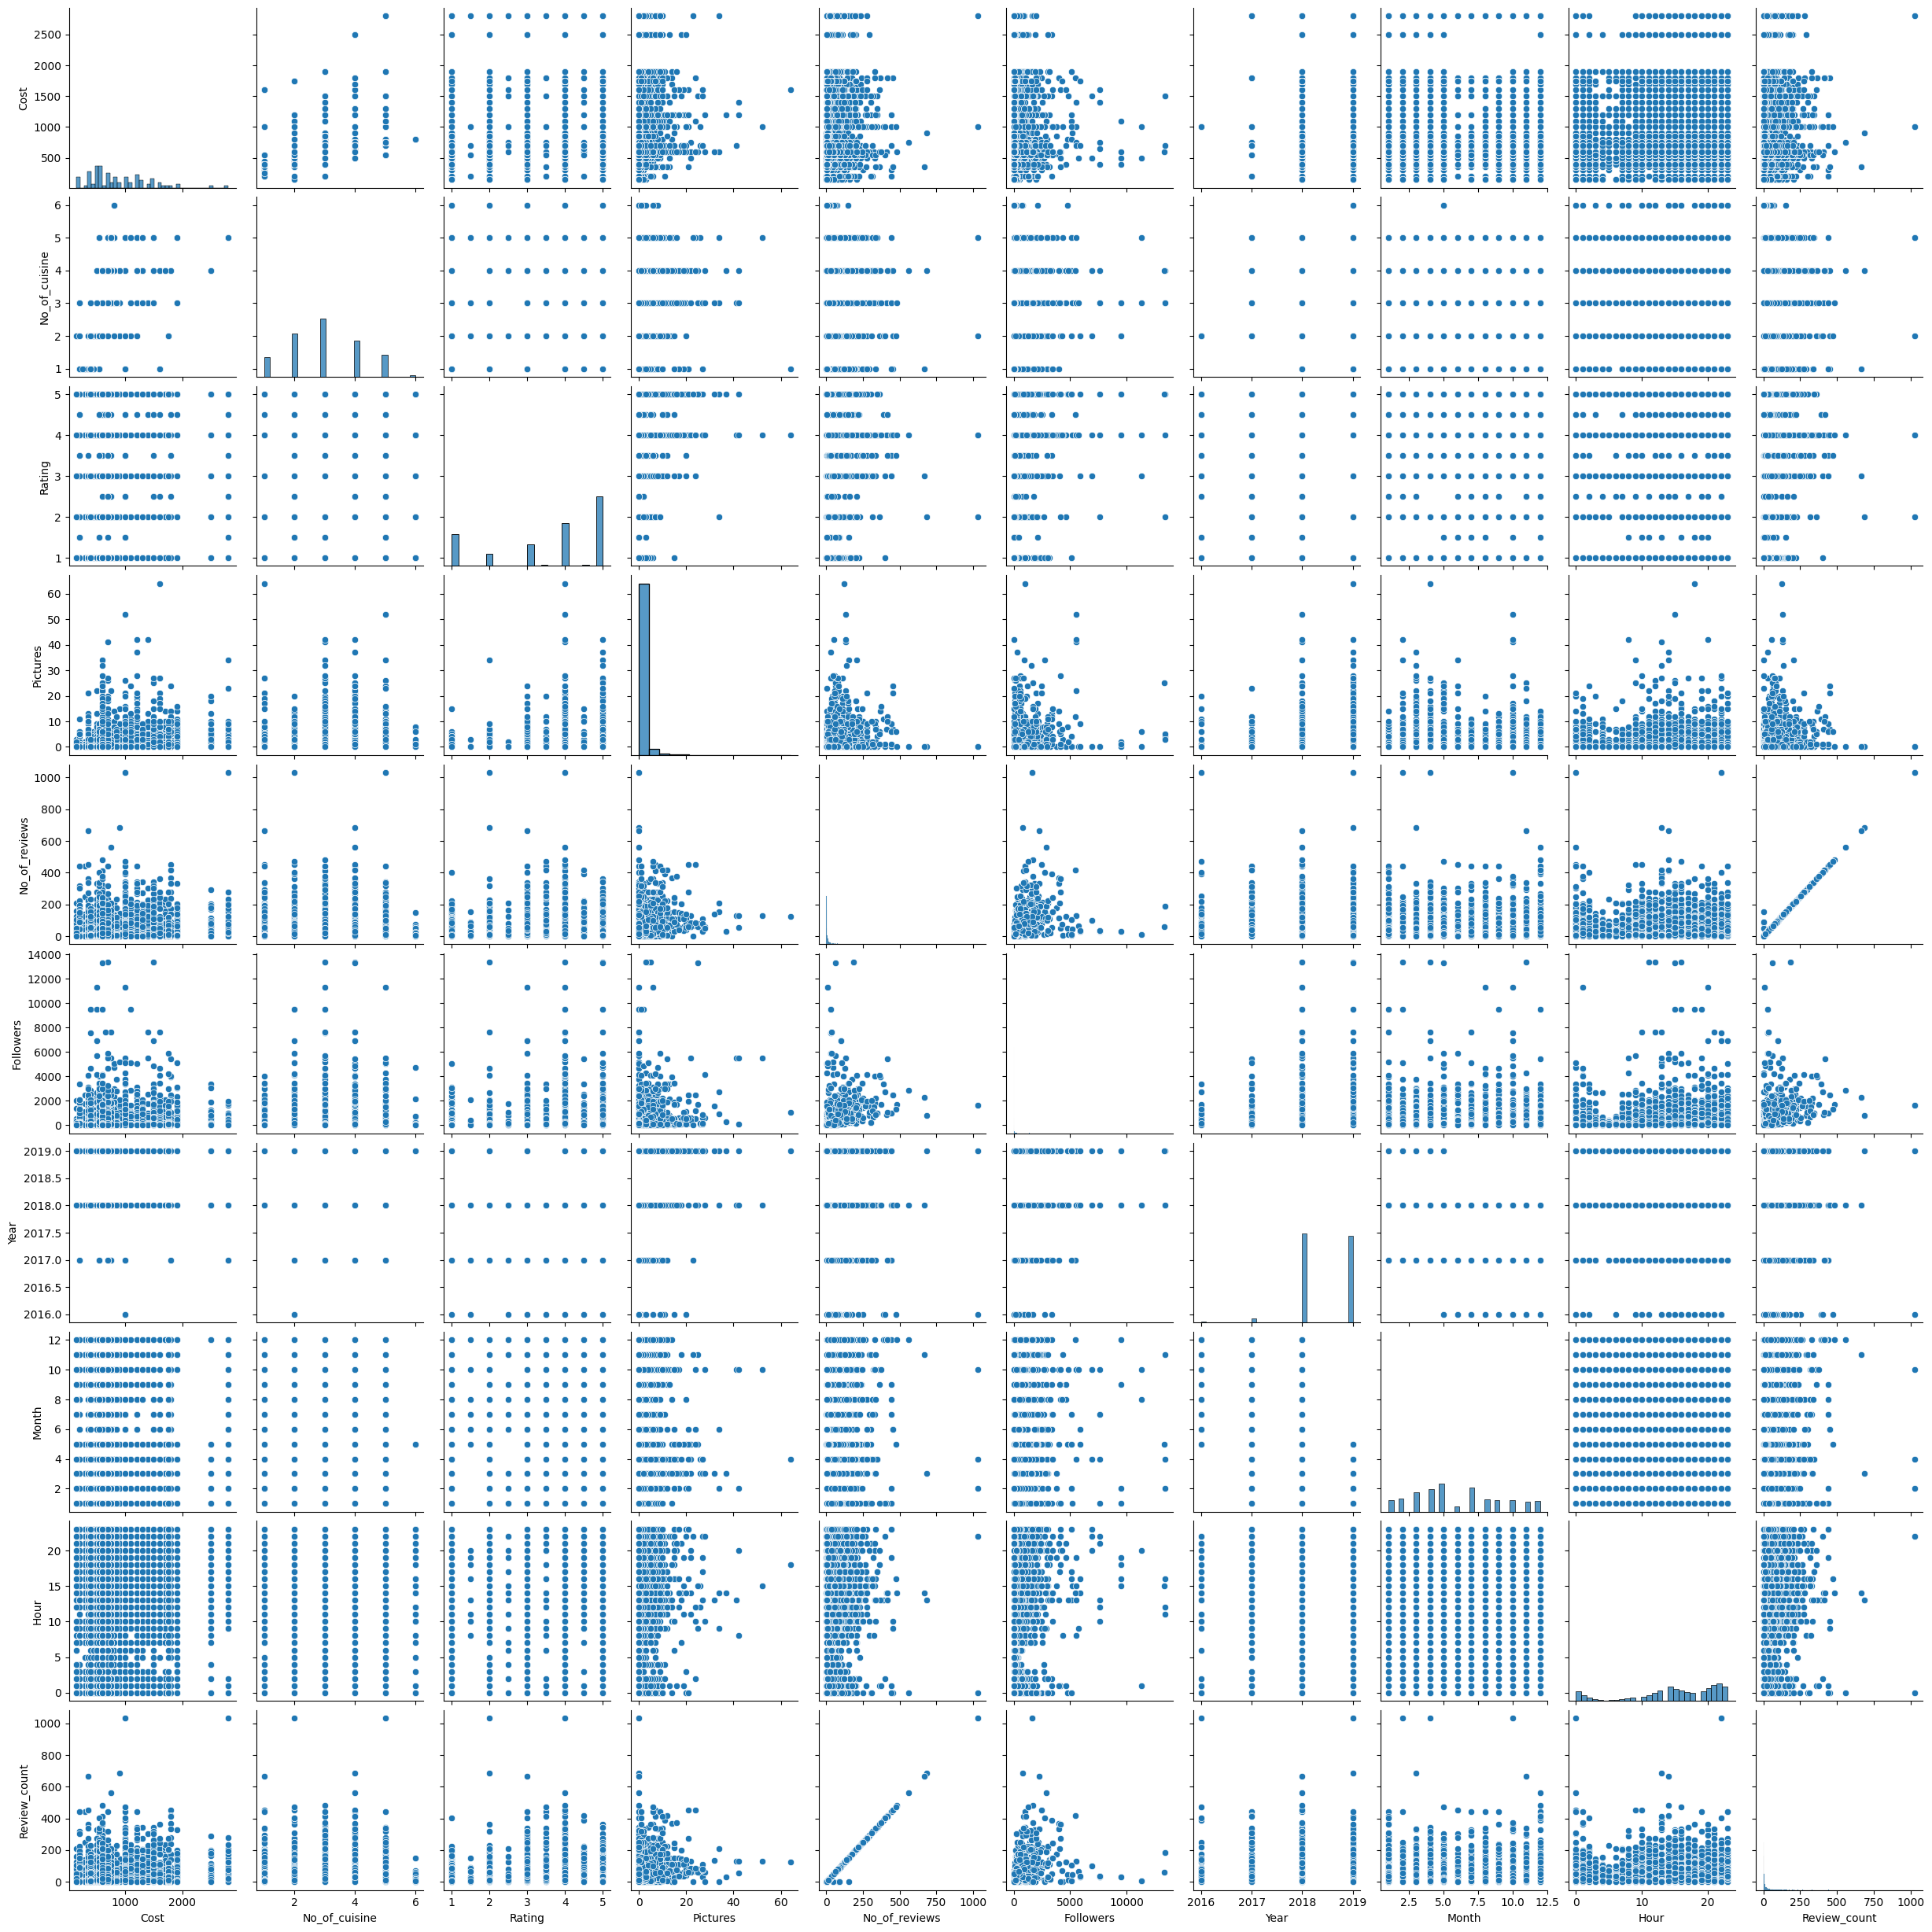

In [74]:
# Pair Plot visualization code
sns.pairplot(zomato_df)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is a useful tool for understanding the relationship between two variables or clustering our data. It can also be used to create simple classification models by drawing lines to linearly separate our dataset. By analyzing the patterns and relationships in our data, pair plots provide a graphical representation similar to a correlation map.

##### 2. What is/are the insight(s) found from the chart?

There is no significant correlation between the given features in the merged dataframe.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [81]:
# Handling Missing Values & Missing Value Imputation
pd.set_option('display.max_rows', None)
# Handling Missing Values & Missing Value Imputation
zomato_df.isna().sum()

Restaurant_name       0
Links                 0
Cost                  0
Collections        5003
Cuisines              0
Timings             100
No_of_cuisine         0
Reviewer              7
Review               14
Rating                7
Time                  7
Pictures              5
No_of_reviews         7
Followers             5
Year                  7
Month                 7
Hour                  7
Review_count          5
dtype: int64

In [82]:
# checking null values in Collections
missing_percentage = ((zomato_df['Collections'].isnull().sum())/(len(zomato_df['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 50.19%


In [83]:
# We can drop the collection column since it has more than 50% of null values
# But we are Filling null value in collection column with 'not avaialble' tag.
zomato_df['Collections'].fillna('Not Available', inplace=True)
zomato_df['Collections'].isna().sum()

0

In [84]:
# Dropping null value in remaining column as it is very less & will not affect our data
zomato_df.dropna(inplace=True)
zomato_df.isnull().sum()

Restaurant_name    0
Links              0
Cost               0
Collections        0
Cuisines           0
Timings            0
No_of_cuisine      0
Reviewer           0
Review             0
Rating             0
Time               0
Pictures           0
No_of_reviews      0
Followers          0
Year               0
Month              0
Hour               0
Review_count       0
dtype: int64

In [85]:
# to find the shape of the data
zomato_df.shape

(9854, 18)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Handling missing data is a crucial step in any data analysis. Deleting missing values is one approach, but it can lead to a loss of information and potentially bias your analysis. Imputing missing values is another approach where missing data is filled in with estimated values, and it can help to retain the data that would have been lost if we had deleted it.

Using a combination of methods, such as deleting missing values for columns with a small number of missing values and imputing missing values for columns with a significant number of null values, can be an effective way to manage missing data.

In this case, it seems like you have taken a thoughtful approach by imputing missing values for the 'collections' column with an educated guess and also using the dropna() function to delete the missing values for the remaining columns.



### 2. Handling Outliers

In [86]:
# Handling Outliers & Outlier treatments
#function to plot for outlier detection
def outlier_plots(df, features):
  """ function to plot the distribution plot and boxplots for the provided features
      parameters: Dataframe and the features for which we need the plots"""
  for i in range(0,len(features)):
    plt.figure(figsize = (20,10))
    plt.subplot(1,3,1)
    sns.distplot(df[features[i]])
    plt.subplot(1,3,2)
    plt.scatter(range(df.shape[0]), np.sort(df[features[i]].values))
    plt.subplot(1,3,3)
    sns.boxplot(df[features[i]])

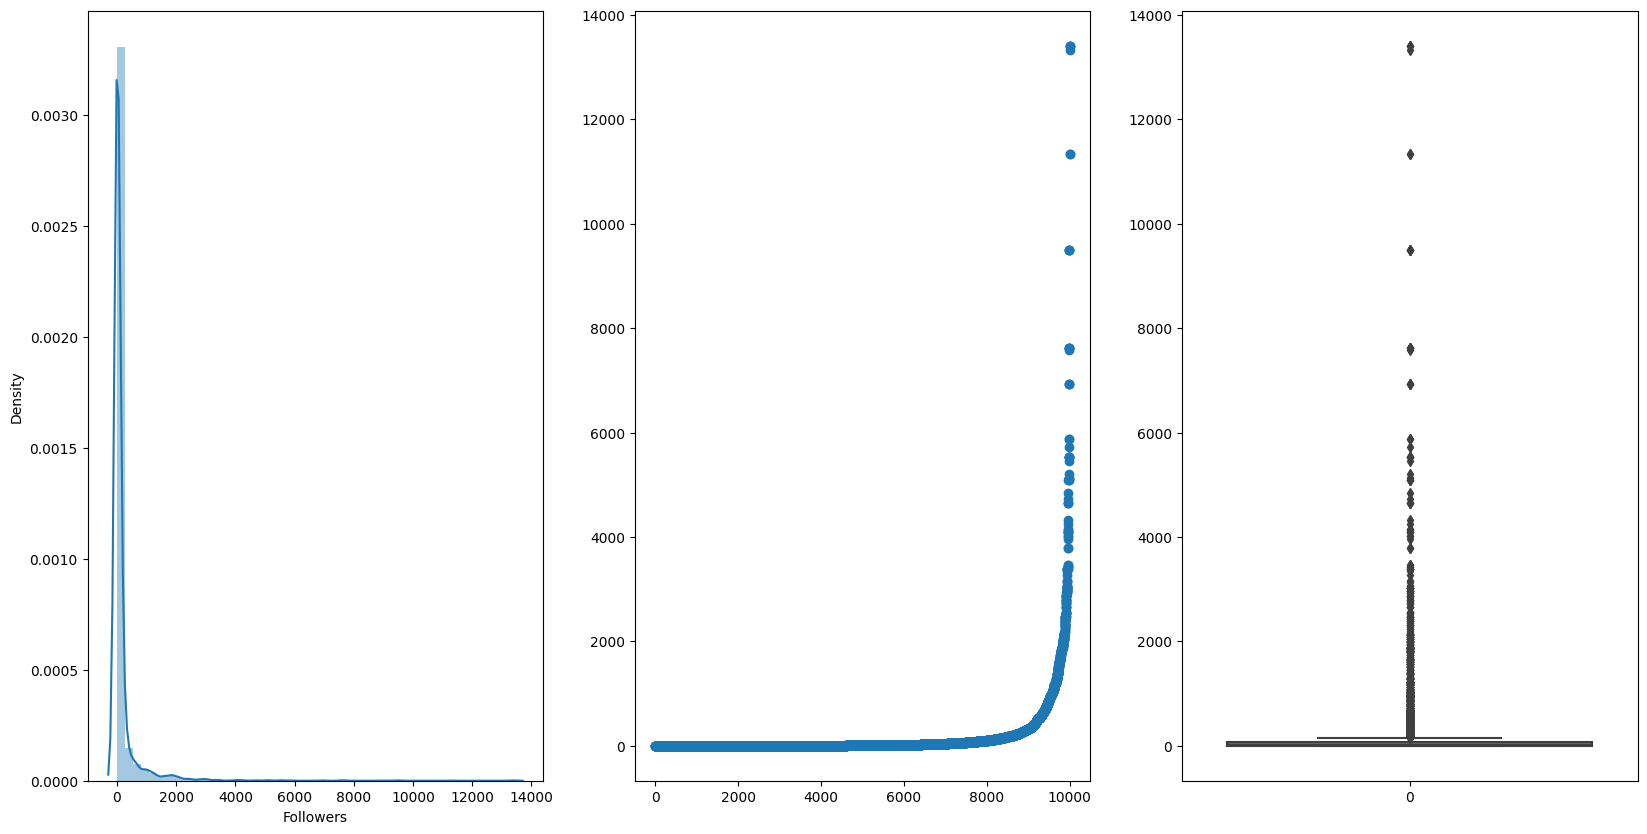

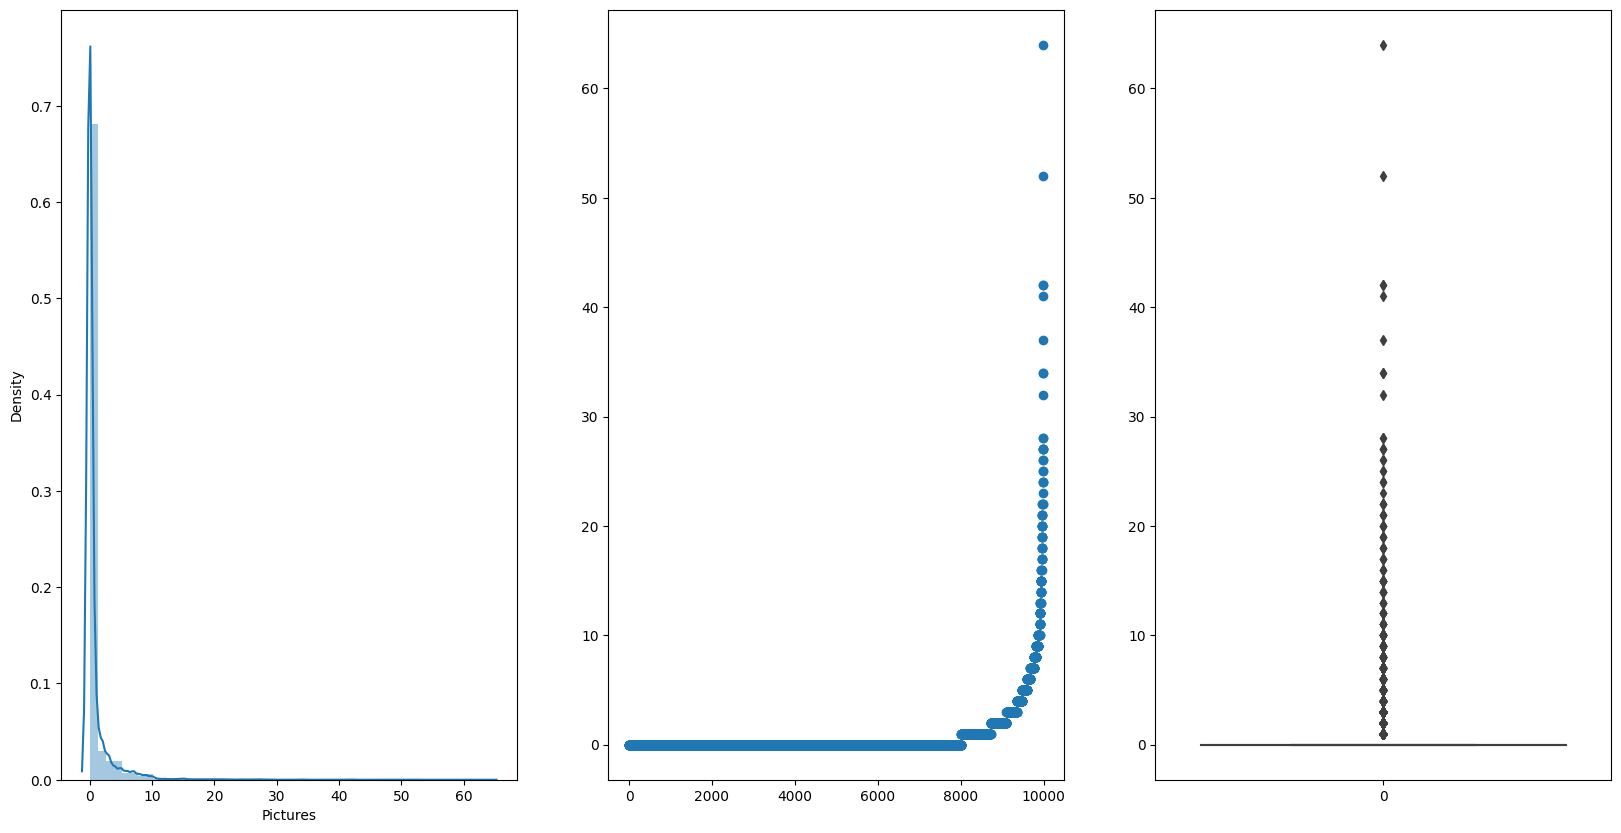

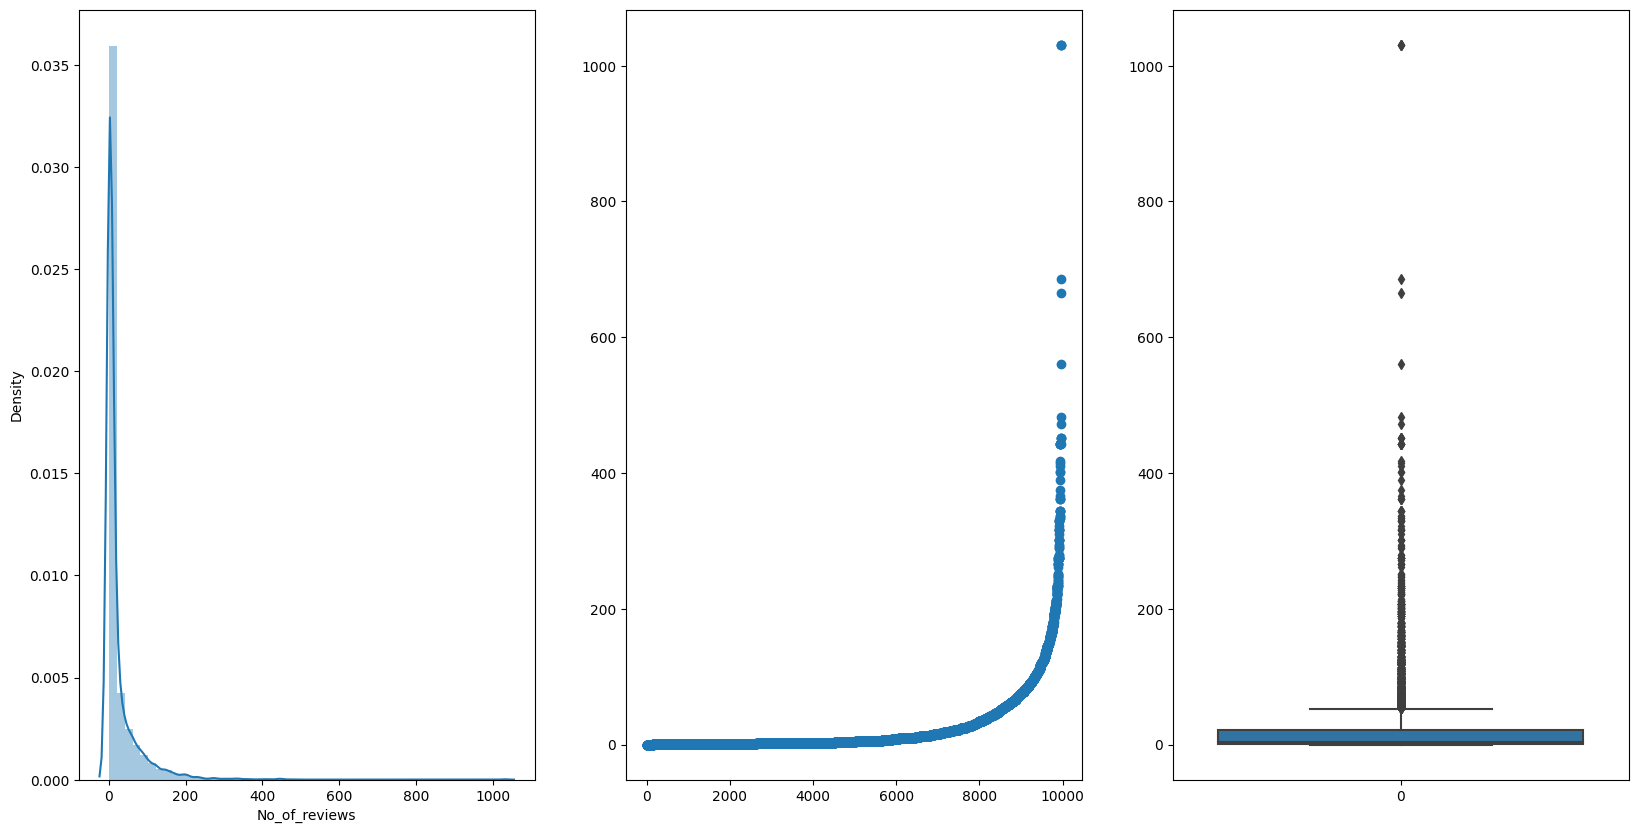

In [87]:
# Getting outliers for review dataset
outlier_plots(review,['Followers','Pictures','No_of_reviews'])

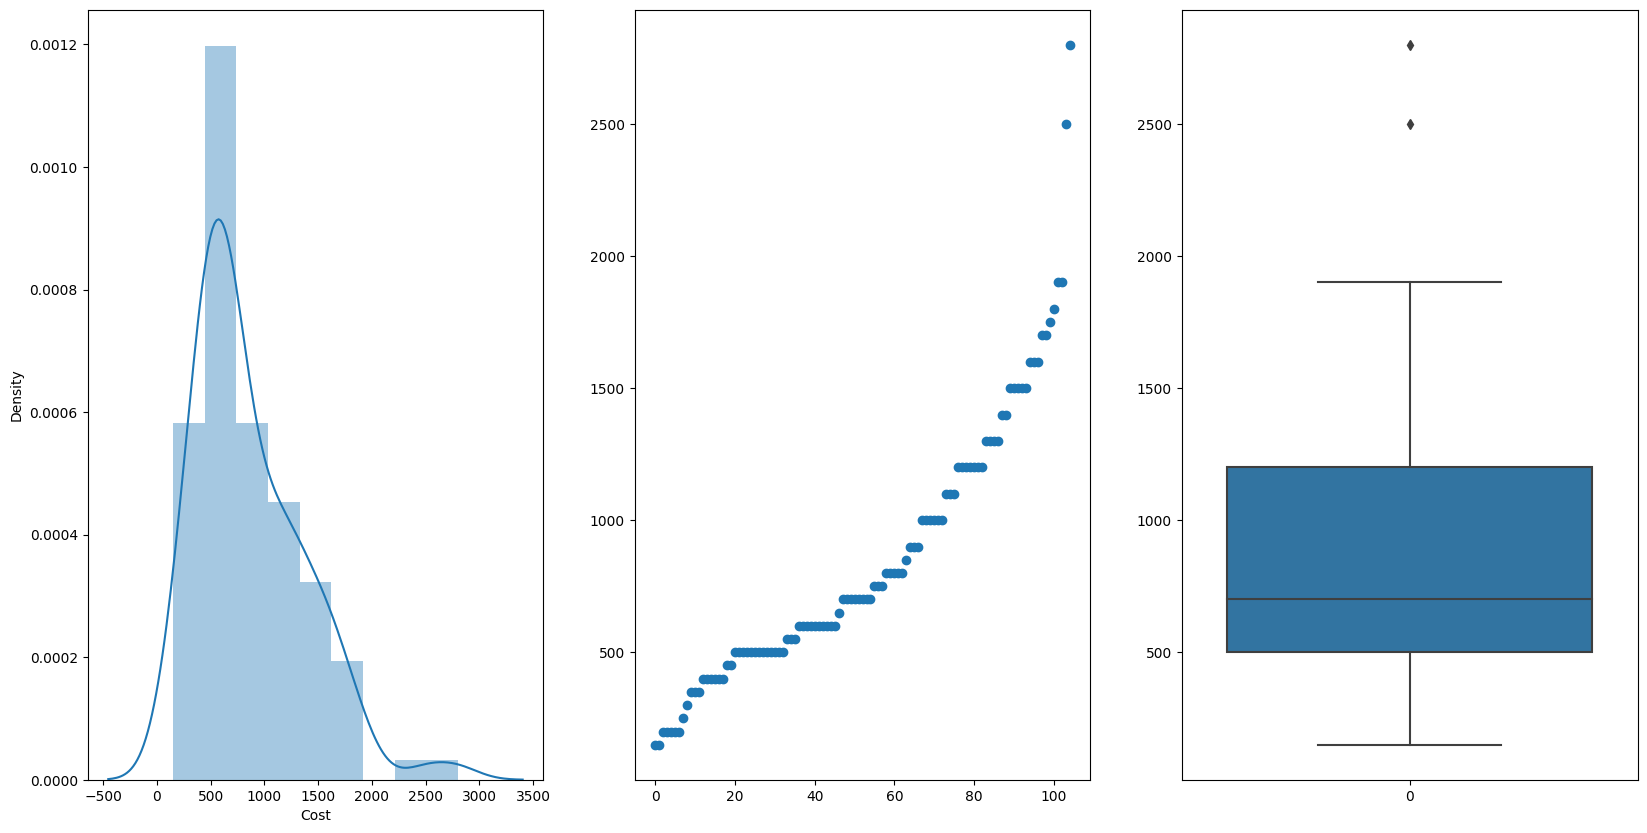

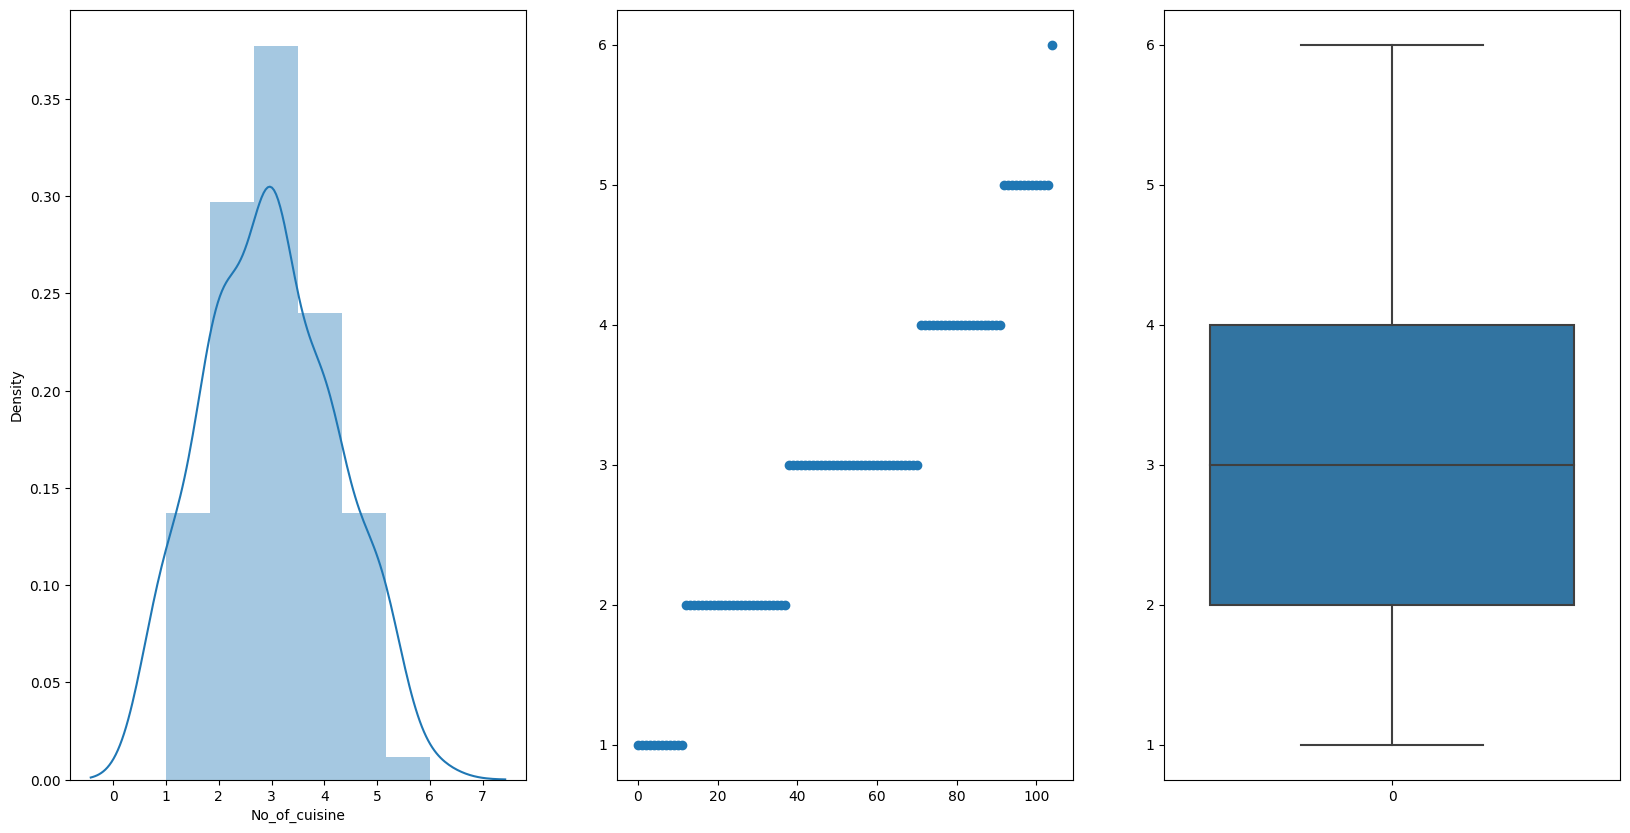

In [88]:
# getting outliers for hotel dataset
outlier_plots(hotel,['Cost','No_of_cuisine'])

In [89]:
#isolation forest for anamoly detection on cost
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(hotel['Cost'].values.reshape(-1, 1))

IsolationForest(contamination=0.01)

In [90]:
# fitting and plotting of outliers
def visualize_outliers(df,features):
  '''Function for fitting and getting plot for outliers'''
  #isolation forest for anamoly detection on cost
  isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
  isolation_forest.fit(df[features].values.reshape(-1, 1))

  #chart to visualize outliers
  xx = np.linspace(df[features].min(), df[features].max(), len(df)).reshape(-1,1)
  anomaly_score = isolation_forest.decision_function(xx)
  outlier = isolation_forest.predict(xx)
  plt.figure(figsize=(10,4))
  plt.plot(xx, anomaly_score, label='anomaly score')
  plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
  where=outlier==-1, color='y',
  alpha=.4, label='outlier region')
  plt.legend()
  plt.ylabel('anomaly score')
  plt.xlabel(features)
  plt.show();

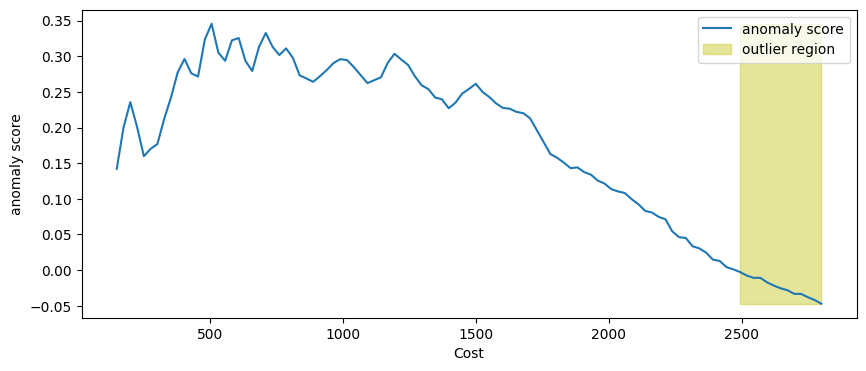

In [91]:
#visualizing outlier for cost
visualize_outliers(hotel,'Cost')

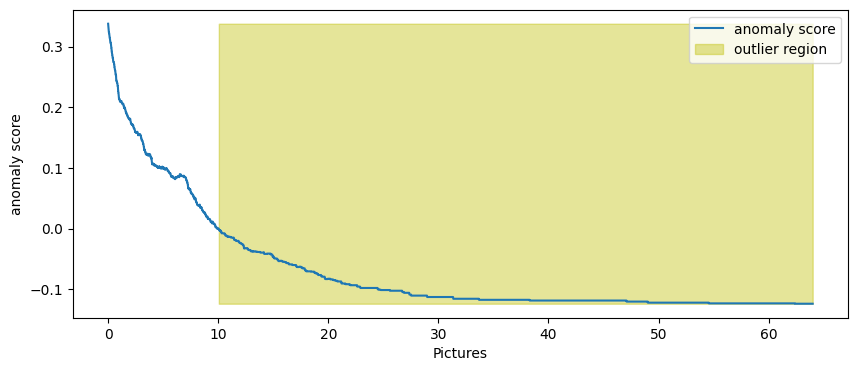

In [92]:
#visualizing outlier for pictures
visualize_outliers(review,'Pictures')

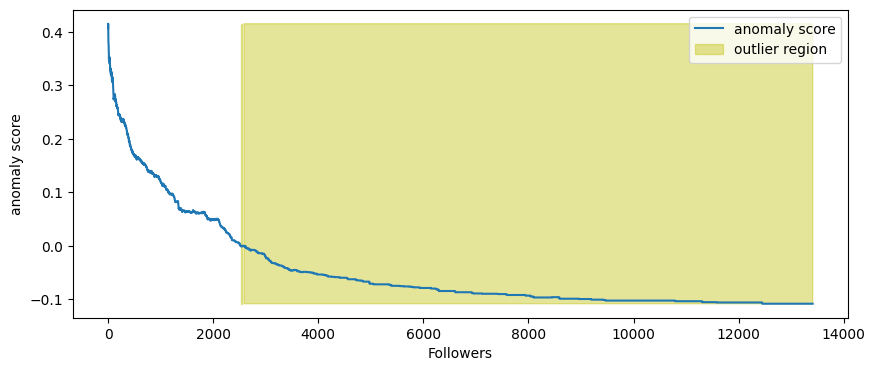

In [93]:
#visualizing outlier for Followers
visualize_outliers(review,'Followers')

In [96]:
# For Skew Symmetric features defining upper and lower boundry

def outlier_treatment_skew(df,feature):

  #inter quartile range
  IQR= df[feature].quantile(0.75) - df[feature].quantile(0.25)
  lower_bound = df[feature].quantile(0.25) - 1.5*IQR
  upper_bound = df[feature].quantile(0.75) + 1.5*IQR
  # print(f'upper : {upper_bound} lower : {lower_bound}')
  return upper_bound,lower_bound

In [97]:
# Restricting the data to lower and upper boundary for features in the dataset
def replace_outliers(df,features):

  #lower limit capping
  df.loc[df[features]<= outlier_treatment_skew(df=df,
                                               feature=features)[1], features]=outlier_treatment_skew(df=df,feature=features)[1]

#upper limit capping
  df.loc[df[features]>= outlier_treatment_skew(df=df,
                                               feature=features)[0], features]=outlier_treatment_skew(df=df,feature=features)[0]

In [99]:
# Replace the outlier value with its upper bound and lower bound
replace_outliers(hotel,'Cost')
replace_outliers(review,'Pictures')
replace_outliers(review,'No_of_reviews')
replace_outliers(review,'Followers')

##### What all outlier treatment techniques have you used and why did you use those techniques?

Using the isolation forest for outlier detection is a good approach. The isolation forest algorithm is an unsupervised method that is particularly useful for detecting anomalies or outliers in a dataset. It works by creating a binary tree structure and isolating the outliers into shorter branches.

The idea behind this algorithm is that outliers will be isolated from the main bulk of data more quickly compared to normal data points. The points that end up in shorter branches are considered anomalies.

Regarding the treatment of outliers, it is common to replace outliers with a predefined upper or lower bound. In your case, you replaced upper outliers with an upper bound and lower outliers with a lower bound, considering that their values cannot exceed these bounds. This is a reasonable approach to handle outliers and ensure that they do not disproportionately influence your analysis.

By replacing outliers with bounds, you are essentially capping the extreme values to ensure they do not have a significant impact on your analysis while still retaining the rest of the data. This helps in maintaining the integrity of your analysis while mitigating the influence of outliers

### 3. Categorical Encoding

In [100]:
hotel_df.columns

Index(['Restaurant_name', 'Links', 'Cost', 'Collections', 'Cuisines',
       'Timings'],
      dtype='object')

In [101]:
# Encode your categorical columns
# Creating dummy data for further
dummy_df = zomato_df.copy()

In [103]:
# Converting Cuisine columns into a list
cuisine_list = hotel_df['Cuisines'].tolist()

In [104]:
# Example DataFrame with 'Cuisine' column
df = pd.DataFrame({'Cuisines':cuisine_list})

# Encode Categorical Variables - one hot encoding
# One hot encoding using get_dummies()
one_hot = pd.get_dummies(df['Cuisines'])

# Adding the one hot encoded columns to the original DataFrame
dummy_df = pd.concat([dummy_df, one_hot], axis=1)
dummy_df.head(2)

,Restaurant_name,Links,Cost,Collections,Cuisines,Timings,No_of_cuisine,Reviewer,Review,Rating,...,"North Indian, Japanese, Italian, Salad, Sushi","North Indian, Mediterranean, European","North Indian, Mughlai","North Indian, Mughlai, Beverages","North Indian, South Indian","Seafood, Goan, North Indian, Continental, Asian","South Indian, North Indian, Chinese","Street Food, Arabian","Street Food, North Indian, Fast Food","Thai, Asian, Chinese, Malaysian"
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
dummy_df.shape

(9854, 110)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Using the isolation forest for outlier detection is a good approach. The isolation forest algorithm is an unsupervised method that is particularly useful for detecting anomalies or outliers in a dataset. It works by creating a binary tree structure and isolating the outliers into shorter branches.

The idea behind this algorithm is that outliers will be isolated from the main bulk of data more quickly compared to normal data points. The points that end up in shorter branches are considered anomalies.

Regarding the treatment of outliers, it is common to replace outliers with a predefined upper or lower bound. In your case, you replaced upper outliers with an upper bound and lower outliers with a lower bound, considering that their values cannot exceed these bounds. This is a reasonable approach to handle outliers and ensure that they do not disproportionately influence your analysis.

By replacing outliers with bounds, you are essentially capping the extreme values to ensure they do not have a significant impact on your analysis while still retaining the rest of the data. This helps in maintaining the integrity of your analysis while mitigating the influence of outliers.


Copy

Add to Editor

Here we are using one hot encoding is a technique used to represent categorical variables as numerical values in a machine learning model. As the category column in our dataset is an important feature for evalution, we have to convert it into numeric for model implementation so we have used this technique. The advantages of using one hot encoding includes:

It allows the use of categorical variables in models that require numerical input. It can improve model performance by providing more information to the model about the categorical variable. It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).


Save Prompt
Using one-hot encoding is indeed a common technique to represent categorical variables as numerical values in machine learning models. It is particularly useful when the categorical variable is a crucial feature for evaluation, as it allows the model to understand and utilize this information effectively.

The advantages of using one-hot encoding are as follows:

Allows the use of categorical variables in models: Many machine learning algorithms require numerical input, so converting categorical variables into numerical form enables the usage of these variables in such models. By converting categories into binary vectors, each corresponding to a unique category, the model can learn and make predictions based on these numerical representations.

Provides more information to the model: By using one-hot encoding, you retain the information about distinct categories as separate binary features. This additional information can improve model performance by allowing the model to analyze and understand the relationships between different categories. It gives the model more inputs to learn from and can potentially capture more nuanced patterns in the data.

Avoids the problem of ordinality: One-hot encoding helps address the issue of ordinality that can arise when a categorical variable has a natural order. If the categories have a specific order (e.g., "small," "medium," "large"), converting them into numerical values directly (e.g., 1, 2, 3) might imply an incorrect ordinal relationship between the categories. By using one-hot encoding, the model treats each category as independent and avoids imposing any unintended ordinal relationships.

Overall, one-hot encoding is a valuable technique for converting categorical variables into a suitable format for machine learning models. It enhances the model's ability to utilize categorical information, provides additional details for analysis, and avoids potential issues with ordinality.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [106]:
# Expand Contraction
# creating datafame for sentiment analysis
sentiment_df = review[['Review', 'Rating']]

In [107]:
# Expand Contraction
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.1 MB/s eta 0:00:00


In [108]:
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(str(x)))

#### 2. Lower Casing

In [109]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

#### 3. Removing Punctuations

In [110]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''This function is for removing punctuation'''
   # replacing the punctuations with no space, hence punctuation marks will be removed
  translator = text.translate(str.maketrans('', '', string.punctuation))
  # return the text stripped of punctuation marks
  return (translator)


In [111]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)

In [112]:
sentiment_df.sample(3)

,Review,Rating
3084,excellent taste and awesome food chicken tikka...,5.0
1464,visited this place with my friends strong reco...,3.0
5720,chilli potato and dal tadka is best at this pl...,5.0


#### 4. Removing URLs & Removing words and digits contain digits.

In [113]:
# Remove URLs & Remove words and digits contain digits

#function to remove digits
def remove_digit(text):
  '''Function to remove digit from text'''
  char_str = '' .join((z for z in text if not z.isdigit()))
  return char_str

In [114]:
#remove digit using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_digit)

#### 5. Removing Stopwords & Removing White spaces

In [116]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [117]:
# creating object for english stopwords
sw = stopwords.words('english')

In [118]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

sentiment_df['Review'] = sentiment_df['Review'].apply(remove_stopwords)

In [119]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [120]:
# Installing and importing necessary libraries for removing emojis
!pip install emot
from emot.emo_unicode import UNICODE_EMOJI # For emojis
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.4 MB/s eta 0:00:00


#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***